# Group 17
# Facial Emotion Prediction

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Exploring the dataset

In [2]:
print(os.listdir('/kaggle/input/fer2013'))

['test', 'train']


In [3]:
train_path = '/kaggle/input/fer2013/train'
val_path = '/kaggle/input/fer2013/test'

### Function to plot the images

In [4]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



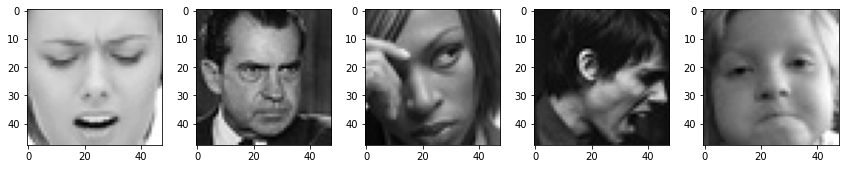

In [5]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Disgust: 



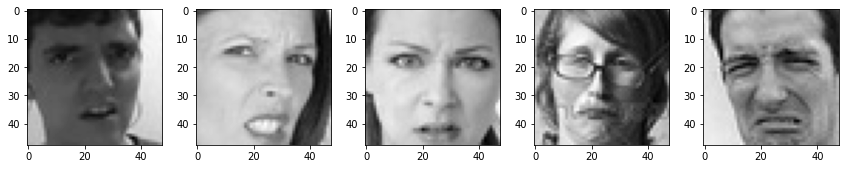

In [6]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Fear: 



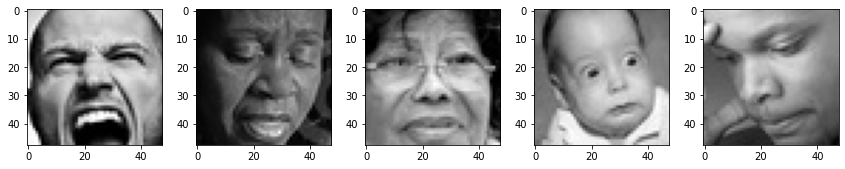

In [7]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



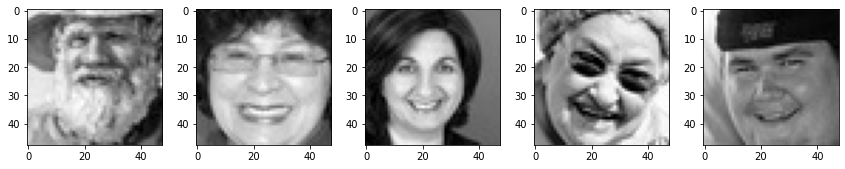

In [8]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



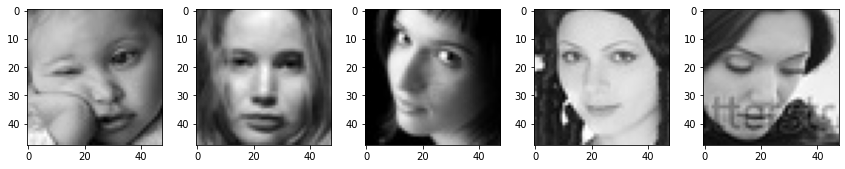

In [9]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



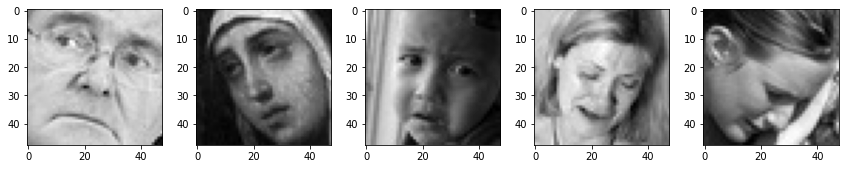

In [10]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

Surprise: 



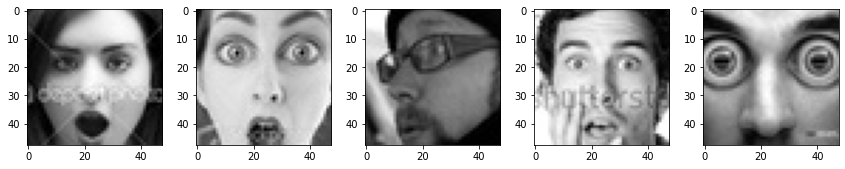

In [11]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

# Data Pre-Processing

In [12]:
# Importing TensorFlow libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

2021-09-18 11:52:56.994202: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [13]:
# We are getting the directories with images and storing the labels of the
# respective directories as lists
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


<b>We are rescaling the Image data and storing it's properities to a tuple</b>

In [14]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Data Summarization

In [15]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

### Building the Model

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

2021-09-18 11:53:32.076106: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-18 11:53:32.079336: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-18 11:53:32.115844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-18 11:53:32.116485: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-18 11:53:32.116540: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-18 11:53:32.143926: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [17]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

### Training the Model

<b>An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large).</b>

In [18]:
num_epochs = 100
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [19]:
# Train Model
history = model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-18 11:53:35.145369: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-18 11:53:35.149708: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/100


2021-09-18 11:53:36.330163: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-18 11:53:37.128363: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-18 11:53:37.143833: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


448/448 [==============================] - 185s 398ms/step - loss: 2.3241 - accuracy: 0.1957 - val_loss: 1.8278 - val_accuracy: 0.2472
Epoch 2/100
448/448 [==============================] - 30s 68ms/step - loss: 1.8385 - accuracy: 0.2358 - val_loss: 1.8133 - val_accuracy: 0.2472
Epoch 3/100
448/448 [==============================] - 30s 67ms/step - loss: 1.8151 - accuracy: 0.2512 - val_loss: 1.8102 - val_accuracy: 0.2475
Epoch 4/100
448/448 [==============================] - 31s 68ms/step - loss: 1.7937 - accuracy: 0.2565 - val_loss: 1.7576 - val_accuracy: 0.2762
Epoch 5/100
448/448 [==============================] - 30s 68ms/step - loss: 1.7051 - accuracy: 0.3158 - val_loss: 1.7157 - val_accuracy: 0.3072
Epoch 6/100
448/448 [==============================] - 31s 70ms/step - loss: 1.5890 - accuracy: 0.3716 - val_loss: 1.5083 - val_accuracy: 0.3912
Epoch 7/100
448/448 [==============================] - 31s 69ms/step - loss: 1.5003 - accuracy: 0.4106 - val_loss: 1.5655 - val_accuracy: 0.

### Save Model

In [20]:
models.save_model(model, 'fer2013_cnn.h5') 

### Evaluate Model

In [21]:
score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss:  1.4620696306228638
Test accuracy:  0.6517857313156128


# Data Visualization

### Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


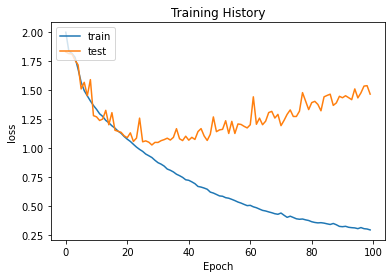

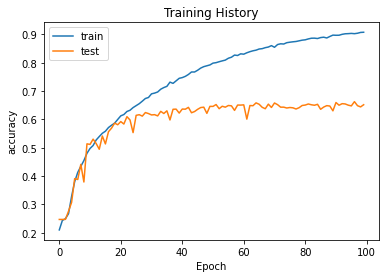

In [22]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')